<a href="https://colab.research.google.com/github/dprobity/machinelearning/blob/main/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Notebook Imports and Packages


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

$$f(x) = x^2 + x + 1$$


In [29]:
def f(x):
    return x**2 + x**1 + 1

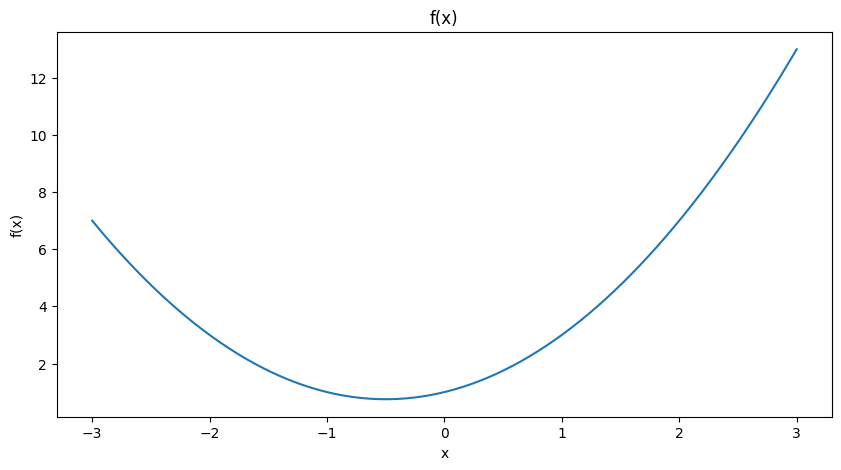

In [32]:
x_1 = np.linspace(start=-3, stop=3, num=500)

plt.figure(figsize=(10, 5))
# plt.scatter(x_1, f(x_1))
plt.title("f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives

In [34]:
def slope(x):
  return 2*x + 1


slope(2)

5

# $d(x^n)/dx = n.x^n-1$

Plot the function and the derivative side by side


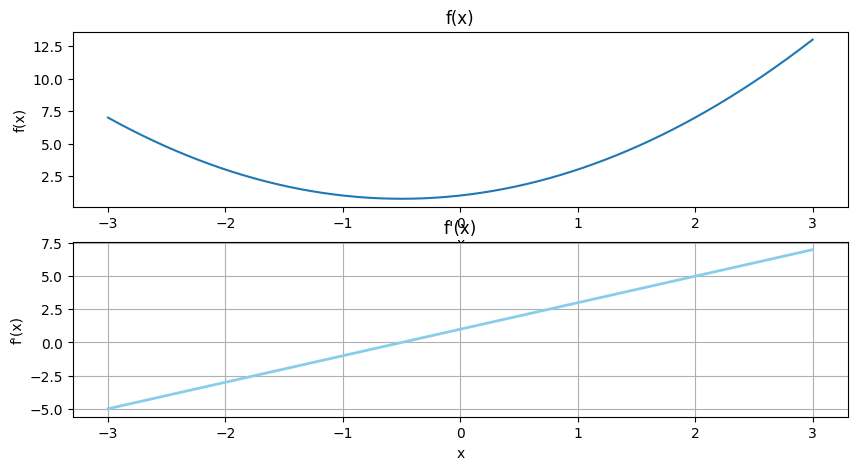

In [46]:
x_1 = np.linspace(start=-3, stop=3, num=500)

plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
# plt.scatter(x_1, f(x_1))
plt.title("f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x_1, f(x_1))

plt.subplot(2, 1, 2)
plt.title("f'(x)")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.plot(x_1, slope(x_1), c='skyblue', linewidth=2)
plt.grid()
plt.show()

## Python loops & Gradient Descent

In [47]:
# python Loop


for n in range(5):
  print('Hello World', n)
  print(n**2)
print('End loop')

Hello World 0
0
Hello World 1
1
Hello World 2
4
Hello World 3
9
Hello World 4
16
End loop


In [48]:
# python while loop

countter = 0

while countter < 5:
  print('Hello World', countter)
  print(countter**2)
  countter += 1
print('End of waiting tine Ready or not, here I come')

Hello World 0
0
Hello World 1
1
Hello World 2
4
Hello World 3
9
Hello World 4
16
End of waiting tine Ready or not, here I come
